In [ ]:
#Install package
!pip3 install spectrafp

# Generating SpectraFP
- This descriptor can be used for any list of signals. Ex: [17.7, 20.0, 22.9, 28.9, 29.9, 35.8, 37.6,170.1]

In [1]:
import pandas as pd
from SpectraFP import SpectraFP

In [10]:
#Here i used pickle compress format, but can be csv.
path = 'nmr.pkl'
df = pd.read_pickle(path, compression='zip')
df

,smiles,ppm_carbon
0,C1(C(C(C2(C(C1([H])[H])(C(C(=C(C2([H])[H])[H])...,"[17.6, 18.3, 22.6, 26.5, 31.7, 33.5, 41.8, 42...."
1,C1(C(C2(C3(C1(C(=C(C3(C([H])([H])[H])[H])C(O[H...,"[17.7, 20.0, 22.9, 28.9, 29.9, 35.8, 37.6, 39...."
2,[N+]1(=C(C(N(C1(C([H])([H])[H])C([H])([H])[H])...,"[23.3, 23.5, 26.1, 60.5, 90.0, 132.1]"
3,C(=C(C1(C([H])([H])[H])C(C(=C([H])[H])C([H])([...,"[16.0, 18.8, 20.9, 25.2, 33.8, 34.5, 38.7, 46...."
4,C(C(O[H])(C(C([H])([H])[H])(C([H])([H])[H])[H]...,"[7.7, 11.8, 12.5, 15.3, 15.8, 19.8, 25.2, 27.0..."
...,...,...
32104,C(C(C(C(C(O[H])([H])[H])(O[H])[H])(O[H])[H])(O...,"[63.1968, 69.1801, 70.7443]"
32105,C(C(=O)O[H])(C(C(C(=O)O[H])([H])[H])([H])[H])(...,"[25.5207, 30.0229, 53.842, 173.841, 177.084]"
32106,C=1(C(C(C(C(C1[H])([H])[H])(C(C([H])([H])[H])=...,"[20.8184, 23.4891, 27.8913, 30.5814, 30.7878, ..."
32107,C(C(N([H])[H])(C(O[H])([H])[H])[H])(=O)O[H],"[56.3474, 60.1336, 172.385]"


In [11]:
specfp = SpectraFP(range_spectra=[0, 240, 0.1])

In [17]:
#Create a unique fingerprint
ppm_list = df.ppm_carbon[0]
fp = specfp.genFP(sample=ppm_list,
             correction=3,
             spurious_variables=False,
             precision=1)

print('ppm_list:\n{}\n\nFP\n{}'.format(ppm_list, fp))

ppm_list:
[17.6, 18.3, 22.6, 26.5, 31.7, 33.5, 41.8, 42.0, 42.2, 78.34, 140.99, 158.3, 193.4, 203.0]

FP
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [22]:
# Run in a complete dataset
# Colnames are the centroids (allowed signs when corretion >= 1)
ppms = df.iloc[0:100, :].ppm_carbon.values

fps = specfp.fit(data_signs=ppms, 
                 correction=1, 
                 precision=1, 
                 spurious_variables=False, 
                 returnAsDataframe=True, 
                 colabel='ppm-', 
                 verbose=True)
fps

100%|██████████| 100/100 [00:19<00:00,  5.07it/s]


,ppm-0.1,ppm-0.4,ppm-0.7,ppm-1.0,ppm-1.3,ppm-1.6,ppm-1.9,ppm-2.2,ppm-2.5,ppm-2.8,...,ppm-237.4,ppm-237.7,ppm-238.0,ppm-238.3,ppm-238.6,ppm-238.9,ppm-239.2,ppm-239.5,ppm-239.8,ppm-239.9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#get in matrix form
fps.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
help(specfp.fit)

Help on method fit in module SpectraFP.spectrafp:

fit(data_signs, correction=1, precision=1, spurious_variables=False, returnAsDataframe=True, colabel='sign-', verbose=True) method of SpectraFP.spectrafp.SpectraFP instance
    Generate fingerprints of a signs list.
    
    Args:
        data_signs:
            List or matrix of signs.
            
            >>> Example of data format
            array([[1.2, 2.4, 12.3, 145.0],
                   [5.2, 176.3],
                   [12.4, 30.1, 50.3, 70.4,188.7],
                   ...,
                   [2.2, 65.4, 76.1,125.3]])
                
        correction:
            The correction is associated with the
            rigidity of the system. Given a degree of
            freedom of 1, we have that in a vector of
            signals [0.0, 0.1, 0.2] only the value of the
            medium will be considered, i.e., 0.2 and 0.0 
            will be treated as 0.1. This idea arose to try 
            to deal with the fluctuations

# How to search for structures by spectral similarity.

- We utilize the SearchEngine class to search for the structures.
- The database used in this application was structured by us and is inside the application. It is available at the link: https://github.com/jeffrichardchemistry/SpectraFP, in path SpectraFP/data/

In [1]:
from SpectraFP import SearchEngine

In [2]:
se = SearchEngine() #Instancing class

In [19]:
peak_list = [13.4, 14.0, 22.7, 27.1, 29.4, 29.7, 29.8, 30.8, 32.0, 46.4, 204.4]
get_structures = se.search(signs_list=peak_list,
                           threshold=0.66,
                           difBetween13C=7,
                           correction=3,
                           similarity='geometric')

In [20]:
get_structures #display as dict

{'C(C(C([H])([H])[H])(C(C(C(C(C(C(C(C(C([H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])[H])(=O)[H]': 1.0,
 'C(C(C([H])([H])[H])(C(C(C(C(C(C(C(C([H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])[H])(=O)[H]': 0.8888888888888888,
 'C(C(C(C(C(C(C(C(C([H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])([H])[H]': 0.6666666666666666,
 'C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C([H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])([H])[H]': 0.6666666666666666,
 'C(C(C(C(C(C(C(C([H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])([H])[H]': 0.6666666666666666,
 'C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C([H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])[H])([H])([

In [25]:
import pandas as pd
#display as dataframe
pd.DataFrame({'Smiles':get_structures.keys(), 'Similarity':get_structures.values()})

,Smiles,Similarity
0,C(C(C([H])([H])[H])(C(C(C(C(C(C(C(C(C([H])([H]...,1.000000
1,C(C(C([H])([H])[H])(C(C(C(C(C(C(C(C([H])([H])[...,0.888889
2,C(C(C(C(C(C(C(C(C([H])([H])[H])([H])[H])([H])[...,0.666667
3,C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C([H])([...,0.666667
4,C(C(C(C(C(C(C(C([H])([H])[H])([H])[H])([H])[H]...,0.666667
5,C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C(C([H])([H])[...,0.666667
6,C(C(C(C(C(C(C(C(C(C(C([H])([H])[H])([H])[H])([...,0.666667


In [21]:
help(se.search)

Help on method search in module SpectraFP.spectrafp:

search(signs_list=[], threshold=0.8, difBetween13C=5, correction=3, similarity='tanimoto', alpha=1, beta=0.5) method of SpectraFP.spectrafp.SearchEngine instance
    This function perform a similarity search between spectraFPs (query -> database) from a list of signs.
    
    Parameters
    ----------
    signs_list : TYPE, list
        List of signs, must be inside the interval
        0.0 to 240.0. example [0.1, 14.5, 25.3, 125.3, 190.3].
    threshold : TYPE, float
        Must be inside interval 0 to 1. The default is 0.8.
    difBetween13C : TYPE, int
        This parameter is a kind of filter. This means
        the difference between the amount of signs, in spectraFP form,
        between the query sample and the samples from database.
        The default is 5. Set 'False' to do not use this filter.
    correction : TYPE, int
        The correction is associated with the
        rigidity of the system. Given a degree of
    

# Generating SpectraFP1H
- This descriptor was developed to digitize 1H NMR spectra data, involving chemical shift data, multiplicity label and the quantity of hydrogens referring to a given signal (when this information is available.
<br>
<br>
- The objective is to digitalizing these 1H NMR data into a correlation matrix, where each column represents a chemical shift (the range is defined by the user) and the rows represent the signal multiplicity label. Therefore, given the position of a signal in this matrix, the value assigned to that position is the number of hydrogens contained in that signal. The following image provides an illustration of what the descriptor looks like

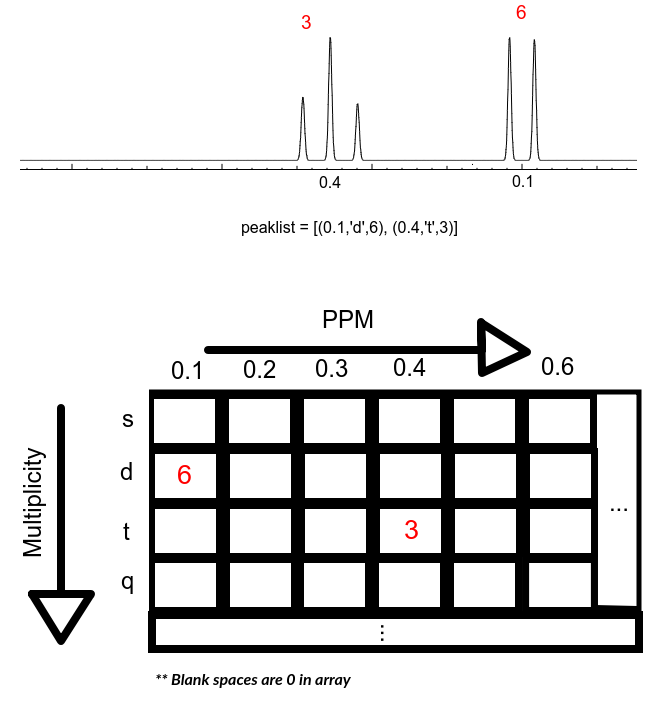




In [2]:
from SpectraFP import SpectraFP1H #importing

- The input data must have the same format as the data variable. First position of each tuple is the ppm, second multiplicity and third number of hydrogen of a signal.
- Multiplicity label can be writed as a acronym or full name (Case-insensitive). see the full list below. 

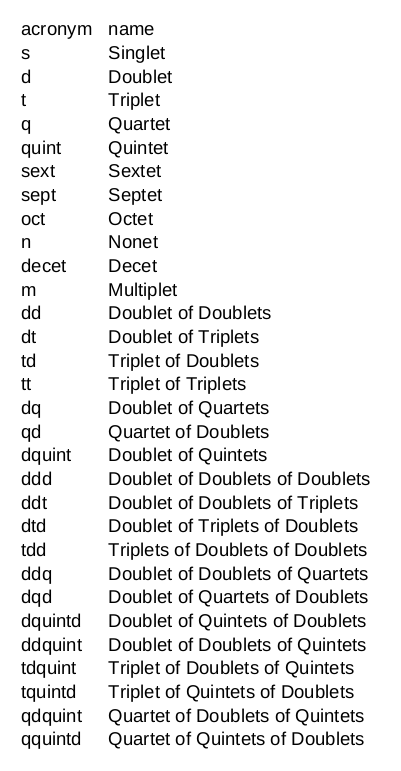

-If a multiplicity is in the input data and does not belong to this list, it will automatically be considered as a multiplet (m)

In [15]:
data = [(0.01,'s',4),(0.12,'s',3),(0.00,'quint',3),(9.98,'doublet',2),(0.12,'t',3)]
hfp = SpectraFP1H(range_spectra=[0,10,0.01],multiplicty_filter=['All'])
result = hfp.genFP(peaks=data, returnAsBinaryValues=False)

In [16]:
result, result.shape

(array([[0., 4., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 2., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (29, 1000))

- It is possible to built this descriptor only with a list of selected multiplicities. In this case, enter a list of multiplicities in the `multiplicty_filter`

In [17]:
data = [(0.01,'s',4),(0.12,'s',3),(0.00,'quint',3),(9.98,'doublet',2),(0.12,'t',3)]
hfp = SpectraFP1H(range_spectra=[0,10,0.01],multiplicty_filter=['s', 'quintet','doublet','t','m'])
result = hfp.genFP(peaks=data, returnAsBinaryValues=False)

In [18]:
result, result.shape

(array([[0., 4., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 2., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [3., 0., 0., ..., 0., 0., 0.]]),
 (5, 1000))

- To get a binary matrix change parameter `returnAsBinaryValues=True`

In [19]:
data = [(0.01,'s',4),(0.12,'s',3),(0.00,'quint',3),(9.98,'doublet',2),(0.12,'t',3)]
hfp = SpectraFP1H(range_spectra=[0,10,0.01],multiplicty_filter=['s', 'quintet','doublet','t','m'])
result = hfp.genFP(peaks=data, returnAsBinaryValues=True)

In [20]:
result, result.shape

(array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 (5, 1000))

- It is possible to built this descriptor without information on the quantity of hydrogens (integral), in this case the value assigned within the matrix will only be equal to 1.

In [2]:
data = [(0.01,'s'),(0.12,'s'),(0.00,'quint'),(9.98,'doublet'),(0.12,'t')]
hfp = SpectraFP1H(range_spectra=[0,10,0.01],multiplicty_filter=['s', 'quintet','doublet','t','m'])
result = hfp.genFP(peaks=data)

In [3]:
result, result.shape

(array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 (5, 1000))

# Search similarity to SpectraFP1H (metabolites)

In [1]:
from SpectraFP import SearchMetabolitesBy1H
from SpectraFP import SpectraFP1H

In [16]:
#data = [(7.69, 'd', 1), (7.64, 'dd', 1), (6.91, 'd', 1), (2.23, 's', 3)]
#data = [(11.96, 'd'), (11.57, 'd'), (11.5, 's'), (7.91, 'm'), (6.99, 's'), (5.92, 'd')]
data = [(7.08, 's', 1), (6.95, 's', 2), (3.89, 's', 3), (3.25, 'm', 2)]

In [17]:
hfp = SpectraFP1H(range_spectra=[0,14,0.01],multiplicty_filter=['All'])
result = hfp.genFP(peaks=data, correction=2, returnAsBinaryValues=False)
result.shape, result

((30, 280),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [20]:
##teste search engine metabolites
sem = SearchMetabolitesBy1H()
db_sim = sem.search(signs1H=data,
            correction=3,
            threshold=0.5,
            difLenghtSigns=7,
            range_spectra=[0,14,0.01],
            multiplicty_filter=['All'],
            n_threads=6)

In [21]:
db_sim

,Name,Smiles,Inchi,CasRN,spectraFP_dtype,spectraFP_NoIntegral,DifSigns,Similarity
0,Normetanephrine,COc1cc(C(O)CN)ccc1O,InChI=1S/C9H13NO3/c1-13-9-4-6(8(12)5-10)2-3-7(...,97-31-4,"[(7.08, s, 1), (6.95, s, 2), (3.89, s, 3), (3....","[(7.08, s), (6.95, s), (3.89, s), (3.25, m)]",0,1.000000
1,1-Methyladenine,Cn1cnc2ncnc-2c1N,InChI=1S/C6H7N5/c1-11-3-10-6-4(5(11)7)8-2-9-6/...,5142-22-3,"[(8.4, s, 1), (8.28, s, 1), (3.9, s, 3)]","[(8.4, s), (8.28, s), (3.9, s)]",1,0.639602
2,Vanillic acid,COc1cc(C(=O)O)ccc1O,InChI=1S/C8H8O4/c1-12-7-4-5(8(10)11)2-3-6(7)9/...,121-34-6,"[(7.52, s, 1), (7.45, dd, 1), (6.94, d, 1), (3...","[(7.52, s), (7.45, dd), (6.94, d), (3.9, s)]",0,0.612372
3,3-Methoxytyramine,COc1cc(CCN)ccc1O,InChI=1S/C9H13NO2/c1-12-9-6-7(4-5-10)2-3-8(9)1...,554-52-9,"[(6.99, s, 1), (6.92, d, 1), (6.83, dd, 1), (3...","[(6.99, s), (6.92, d), (6.83, dd), (3.88, s), ...",2,0.579751
4,Ferulic acid,COc1cc(/C=C/C(=O)O)ccc1O,InChI=1S/C10H10O4/c1-14-9-6-7(2-4-8(9)11)3-5-1...,537-98-4,"[(7.31, d, 1), (7.22, d, 1), (7.11, dd, 1), (6...","[(7.31, d), (7.22, d), (7.11, dd), (6.91, d), ...",2,0.566947
5,3-Methoxy-4-hydroxyphenylglycolaldehyde,COc1cc(C(O)C=O)ccc1O,InChI=1S/C9H10O4/c1-13-9-4-6(8(12)5-10)2-3-7(9...,17592-23-3,"[(9.68, d, 1), (7.05, dd, 1), (6.92, dd, 1), (...","[(9.68, d), (7.05, dd), (6.92, dd), (6.78, dd)...",2,0.566947
6,3-Methoxytyrosine,COc1cc(CC(N)C(=O)O)ccc1O,InChI=1S/C10H13NO4/c1-15-9-5-6(2-3-8(9)12)4-7(...,7636-26-2,"[(6.94, s, 1), (6.89, d, 1), (6.79, dd, 1), (3...","[(6.94, s), (6.89, d), (6.79, dd), (3.95, dd),...",3,0.565779
7,Vanillylmandelic acid,COc1cc([C@H](O)C(=O)O)ccc1O,InChI=1S/C9H10O5/c1-14-7-4-5(2-3-6(7)10)8(11)9...,13244-77-4,"[(7.02, d, 1), (6.89, m, 2), (4.88, s, 1), (3....","[(7.02, d), (6.89, m), (4.88, s), (3.85, s)]",0,0.547723
8,Isoferulic acid,COc1ccc(/C=C/C(=O)O)cc1O,InChI=1S/C10H10O4/c1-14-9-4-2-7(6-8(9)11)3-5-1...,25522-33-2,"[(7.29, d, 1), (7.14, m, 2), (7.04, d, 1), (6....","[(7.29, d), (7.14, m), (7.04, d), (6.36, d), (...",1,0.530330
9,Homovanillic acid,COc1cc(CC(=O)O)ccc1O,InChI=1S/C9H10O4/c1-13-8-4-6(5-9(11)12)2-3-7(8...,306-08-1,"[(6.94, d, 1), (6.87, d, 1), (6.76, dd, 1), (3...","[(6.94, d), (6.87, d), (6.76, dd), (3.86, s), ...",1,0.530330


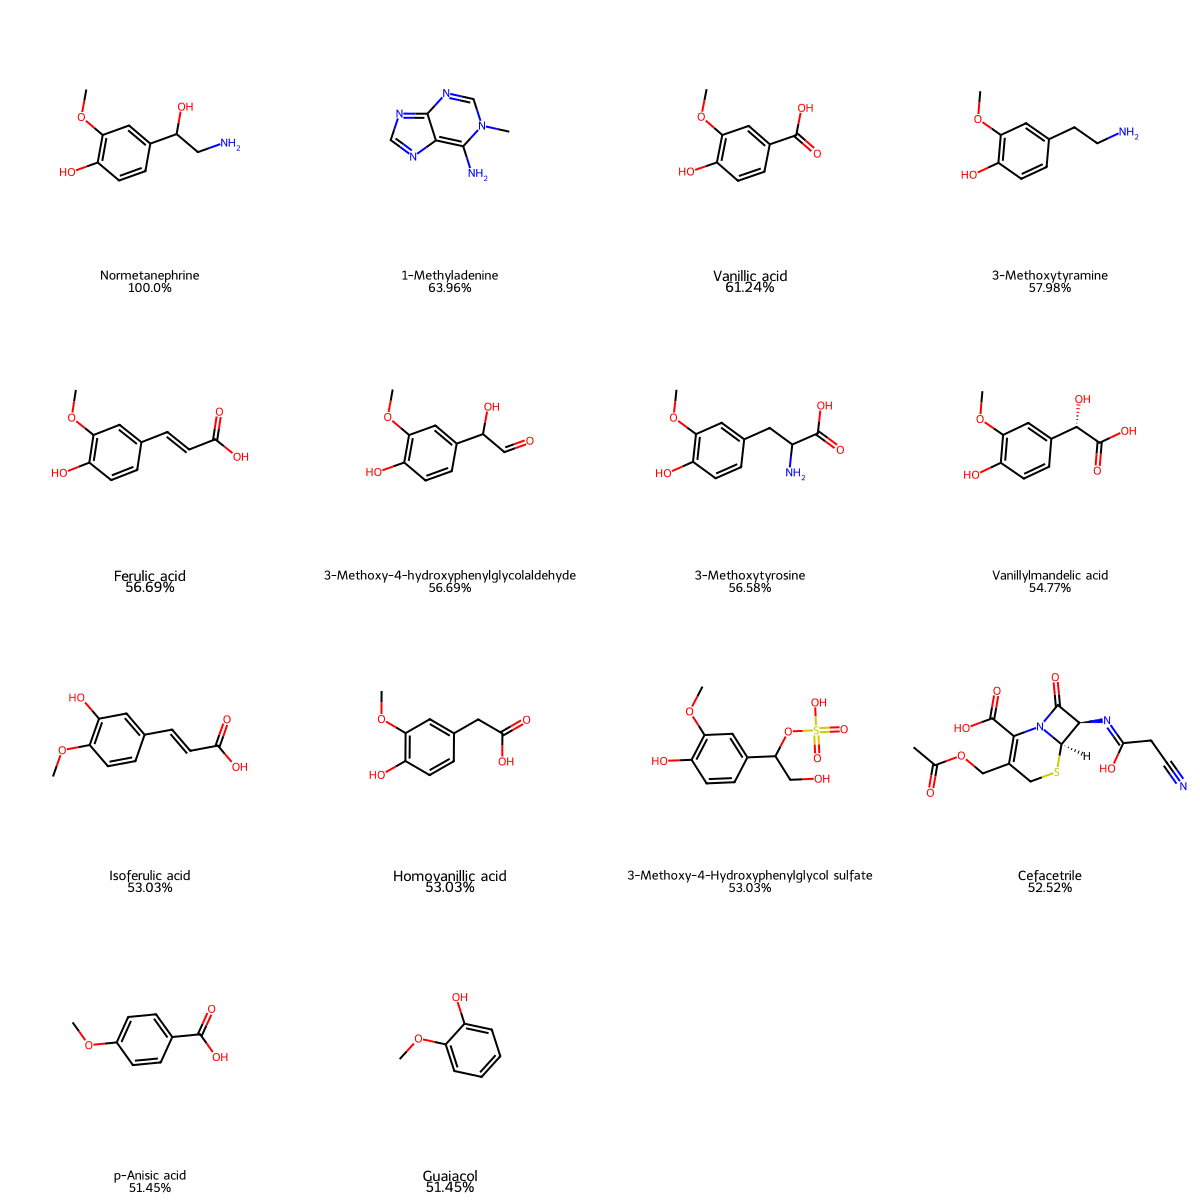

In [31]:
#Returning a img as SVG. TO get SVG Text run img.data
img = SearchMetabolitesBy1H.drawSimilarMolecules(dfSimilarity1H=db_sim,
                                            n_molecules2show=15,
                                            path2save=None,
                                            filename=None)
img